In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import xgboost as xgb
import time
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, accuracy_score, recall_score, balanced_accuracy_score, classification_report, make_scorer, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight
# from xgboost import XGBClassifier, plot_importance
# import optuna
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
df = pd.read_csv("D:\ESP. INTELIGENCIA ARTIFICIAL UBA\AMQ1\df_scaled.csv")

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\PC-Solution 21-3-24\AppData\Local\Temp\ipykernel_25428\1214821697.py:1: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv("D:\ESP. INTELIGENCIA ARTIFICIAL UBA\AMQ1\df_scaled.csv")


In [5]:
df.head()

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,0.873233,1,0.056664,0.097127,0.000000,0.063256,0.518,4.812477,12.179498,8.230173e+09
1,1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,0.797509,1,0.036621,0.069899,0.004201,0.305276,0.693,4.614843,11.999055,8.230173e+09
2,2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,0.847354,0,0.071576,0.076405,0.000023,0.104360,0.613,4.828378,12.081739,8.230173e+09
3,3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,0.836133,1,0.097127,0.028296,0.000009,0.185649,0.277,4.811827,12.038210,8.230173e+09
4,4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,0.807141,1,0.035271,0.077239,0.000000,0.080012,0.725,4.828122,12.149783,8.230173e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28348 entries, 0 to 28347
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28348 non-null  int64  
 1   track_id                  28348 non-null  object 
 2   track_name                28344 non-null  object 
 3   track_artist              28344 non-null  object 
 4   track_popularity          28348 non-null  int64  
 5   track_album_id            28348 non-null  object 
 6   track_album_name          28344 non-null  object 
 7   track_album_release_date  28348 non-null  object 
 8   playlist_name             28348 non-null  object 
 9   playlist_id               28348 non-null  object 
 10  playlist_genre            28348 non-null  object 
 11  playlist_subgenre         28348 non-null  object 
 12  danceability              28348 non-null  float64
 13  energy                    28348 non-null  float64
 14  loudne

In [7]:
# Datos faltantes 
# Test no tiene nulos, train parece tener una fila toda vacía (nan) que hay que eliminar
print(f"Datos faltantes en train sample:")
print(df.isnull().sum(axis = 0))
print('-----------------------------------')
print(f"Datos faltantes en test sample:")
print(df.isnull().sum(axis = 0))

Datos faltantes en train sample:
Unnamed: 0                     0
track_id                       0
track_name                     4
track_artist                   4
track_popularity               0
track_album_id                 0
track_album_name               4
track_album_release_date       0
playlist_name                  0
playlist_id                    0
playlist_genre                 0
playlist_subgenre              0
danceability                   0
energy                         0
loudness                       0
mode                           0
speechiness                    0
acousticness                   0
instrumentalness               0
liveness                       0
valence                        0
tempo                          0
duration_ms                    0
year                        1681
dtype: int64
-----------------------------------
Datos faltantes en test sample:
Unnamed: 0                     0
track_id                       0
track_name                  

In [8]:
# Eliminar nulos 
print(df.shape)
df = df.dropna()
print(df.shape)

(28348, 24)
(26663, 24)


In [9]:
# Primeras Filas
df.head()

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,0.873233,1,0.056664,0.097127,0.000000,0.063256,0.518,4.812477,12.179498,8.230173e+09
1,1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,0.797509,1,0.036621,0.069899,0.004201,0.305276,0.693,4.614843,11.999055,8.230173e+09
2,2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,0.847354,0,0.071576,0.076405,0.000023,0.104360,0.613,4.828378,12.081739,8.230173e+09
3,3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,0.836133,1,0.097127,0.028296,0.000009,0.185649,0.277,4.811827,12.038210,8.230173e+09
4,4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,0.807141,1,0.035271,0.077239,0.000000,0.080012,0.725,4.828122,12.149783,8.230173e+09


In [10]:
# Estadistica descriptiva Var numericas
df.describe()

,Unnamed: 0,track_popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
count,26663.000000,26663.000000,26663.000000,26663.000000,26663.000000,26663.000000,26663.000000,26663.000000,26663.000000,26663.000000,26663.000000,26663.000000,26663.000000,2.666300e+04
mean,15900.497281,39.556914,0.450728,0.521947,0.740258,0.560965,0.099626,0.148081,0.071938,0.167202,0.504652,4.780187,12.288548,8.146760e+09
std,9621.091106,23.637140,0.181057,0.238241,0.096100,0.496279,0.086126,0.169772,0.174525,0.117676,0.233831,0.219894,0.262058,1.231388e+08
min,0.000000,0.000000,0.005944,0.000066,0.000000,0.000000,0.022153,0.000001,0.000000,0.009316,0.000010,3.596682,10.355518,7.495014e+09
25%,7375.500000,22.000000,0.318096,0.336400,0.692583,0.000000,0.040566,0.014396,0.000000,0.088835,0.324000,4.614962,12.137253,8.120601e+09
50%,15715.000000,42.000000,0.451584,0.521284,0.757686,1.000000,0.061753,0.077146,0.000020,0.119559,0.506000,4.812274,12.278947,8.193540e+09
75%,24546.500000,58.000000,0.579121,0.710649,0.807336,1.000000,0.127513,0.231905,0.006961,0.221542,0.688000,4.905053,12.439372,8.230173e+09
max,32832.000000,100.000000,0.966289,1.000000,1.000000,1.000000,0.651283,0.690143,0.690143,0.691145,0.991000,5.482471,13.157366,8.242408e+09


In [11]:
# df['playlist_genre'].unique() # Información detallada por variable

### Variables Numericas
Unnamed: 0 = Sin nombre	
track_popularity = Popularidad de la pista	
danceability = Bailabilidad	
energy	= Energia, 
loudness = Sonoridad	
mode	= Modo
speechiness	= Locuacidad
acousticness	= Acustica
instrumentalness	= Instrumentalidad
liveness	= Viveza
valence	= Valencia
tempo	= Tiempo
duration_ms	= Duración en minutos
year = año
### Varibles Categóricas 
 track_id = Id de la pista
 track_name = Nombre de la pista
 track_artist  = Artista de la pista
 track_popularity = Popularidad de la pista
 track_album_id = Id de álbum de la pista
 track_album_name = Nombre del álbum 
 track_album_release_date = Fecha de lanzamiento del álbum
 playlist_name = Nombre de lista de reproducción
 playlist_id =  Id de la lista de reproducción
 playlist_genre  = Género de la lista de reproducción
 playlist_subgenre = Subgénero de la lista de reproducción



### analisis de variables numéricas

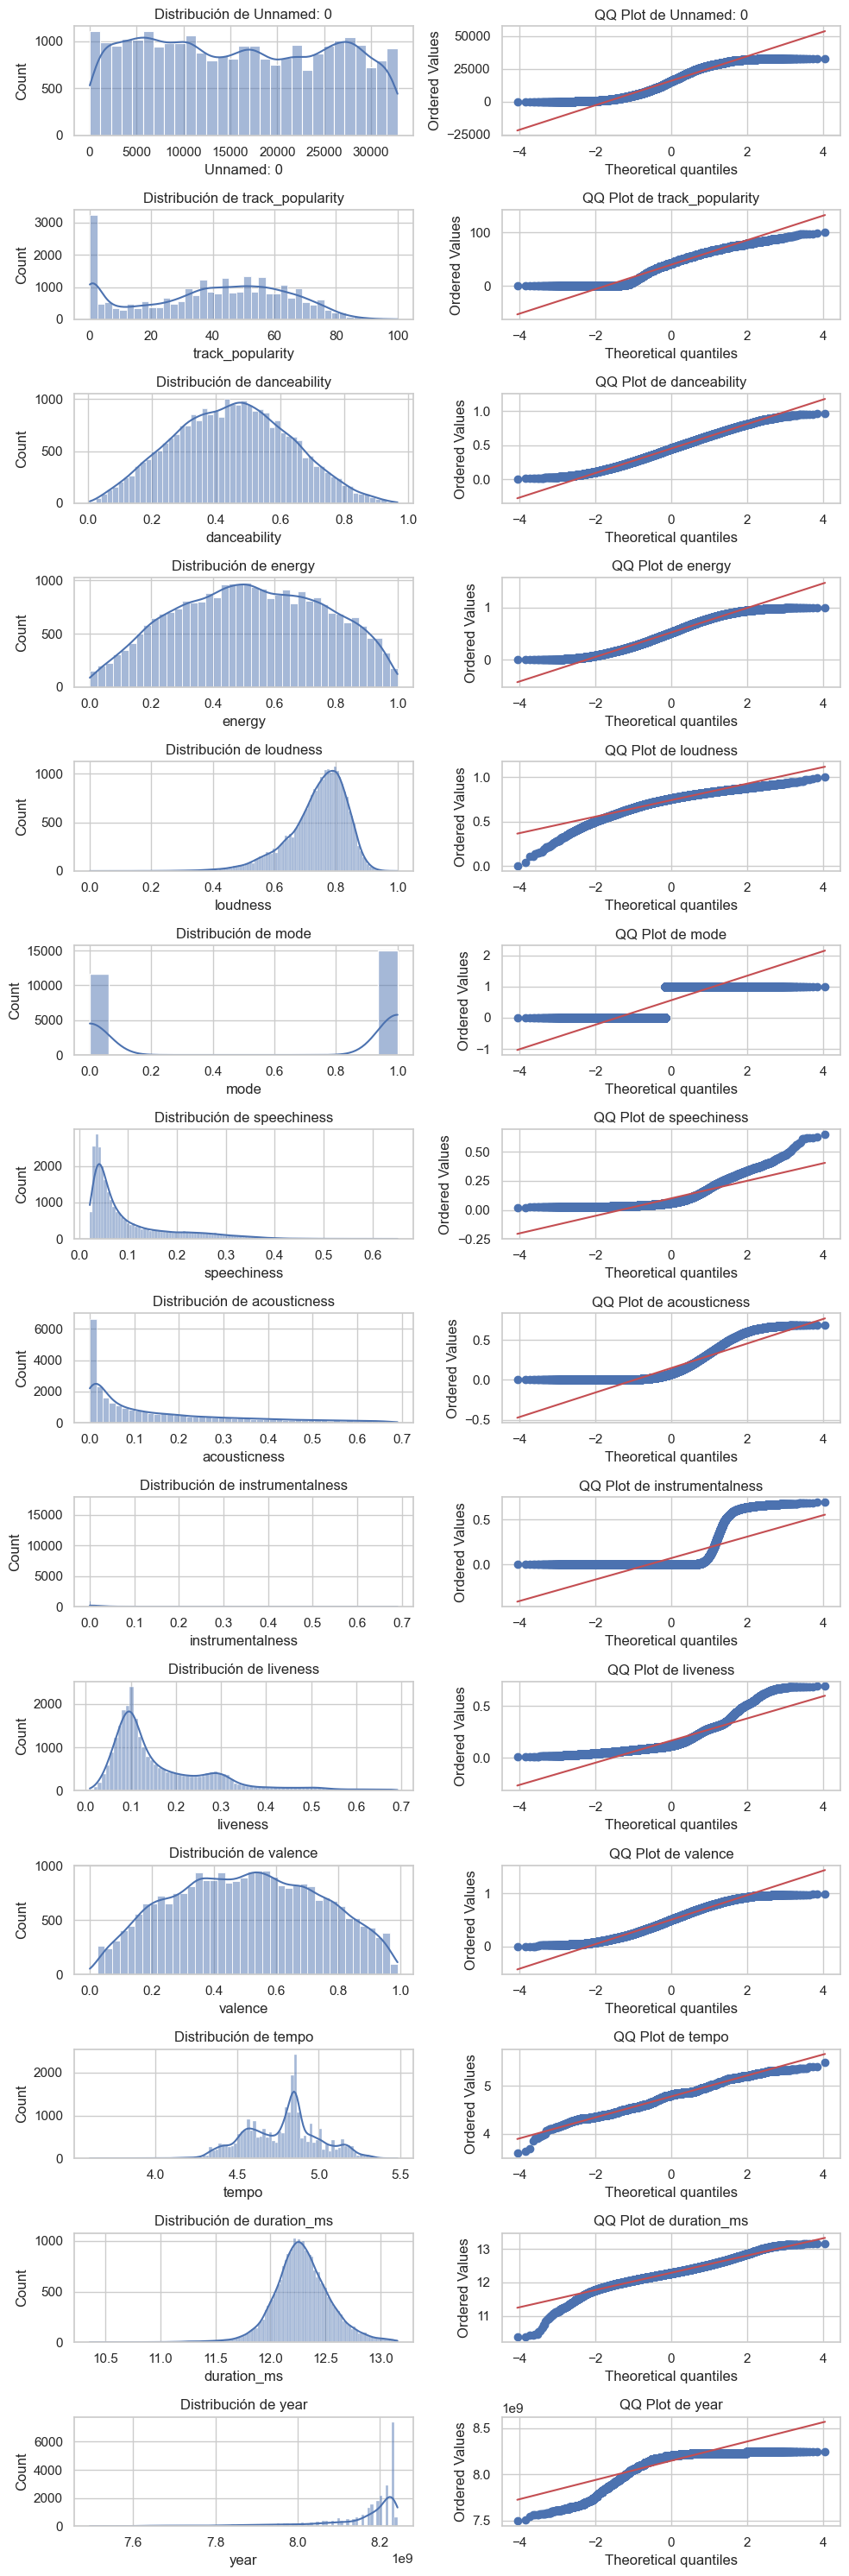

In [12]:
# Configuración de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 30))

# Histograma y QQ plot para cada variable numérica
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

for i, column in enumerate(numerical_columns, 1):
    # Histograma
    plt.subplot(len(numerical_columns), 2, 2*i-1)

    if column == 'Rainfall':
        # Modificaciones para Rainfall
        data = np.log1p(df[column].dropna()[df[column] > 0])
        sns.histplot(data, bins=100, kde=True)
        plt.title(f'Distribución Logarítmica de {column} (Sin Nulos, Bins reducidos)')
    else:
        # Para las otras variables
        sns.histplot(df[column].dropna(), kde=True)
        plt.title(f'Distribución de {column}')

    # QQ plot
    plt.subplot(len(numerical_columns), 2, 2*i)

    if column == 'Rainfall':
        stats.probplot(data, dist="norm", plot=plt)
        plt.title(f'QQ Plot Logarítmico de {column}')
    else:
        stats.probplot(df[column].dropna(), dist="norm", plot=plt)
        plt.title(f'QQ Plot de {column}')

plt.tight_layout()
plt.show()

In [13]:
# Estadistica descriptiva Var categóricas
# Lista de variables categóricas
categorical_columns = ['track_name', 'track_artist', 'track_popularity', 
                       'track_album_name', 'playlist_name', 'playlist_genre', 
                       'playlist_subgenre']

# Función para mostrar valores únicos y sus porcentajes
def unique_values_percentage(df, categorical_columns):
    for col in categorical_columns:
        print(f"Variable: {col}")
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100
        summary_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
        print(summary_df)
        print('-----------------------------------')

print("Train sample:")
unique_values_percentage(df, categorical_columns)

# print("Test sample:")
# unique_values_percentage(customer_test, categorical_columns)

Train sample:
Variable: track_name
                        Count  Percentage
track_name                               
Paradise                   17    0.063759
Breathe                    16    0.060008
Alive                      14    0.052507
Forever                    14    0.052507
Poison                     14    0.052507
...                       ...         ...
911 - Tom Wilson Remix      1    0.003751
Osiris                      1    0.003751
BEACH WITH MY BIX           1    0.003751
Sigo Fresh                  1    0.003751
Typhoon - Original Mix      1    0.003751

[22231 rows x 2 columns]
-----------------------------------
Variable: track_artist
                  Count  Percentage
track_artist                       
Queen               128    0.480066
Martin Garrix        87    0.326295
Don Omar             82    0.307542
David Guetta         80    0.300041
Hardwell             68    0.255035
...                 ...         ...
Rex Williams          1    0.003751
Ngozi Fami

### Limpieza y preparación de datos / ingeniería de features

In [14]:
# Cantidad de observaciones y valores faltantes
num_observaciones = df.shape[0]
print(f'Número de observaciones: {num_observaciones}')

valores_faltantes = df.isna().sum()
porcentaje_faltantes = ((valores_faltantes / num_observaciones) * 100).round(1)
display(pd.DataFrame({
    'Cantidad Faltantes': valores_faltantes,
    'Porcentaje Faltantes': porcentaje_faltantes
}))

Número de observaciones: 26663


,Cantidad Faltantes,Porcentaje Faltantes
Unnamed: 0,0,0.0
track_id,0,0.0
track_name,0,0.0
track_artist,0,0.0
track_popularity,0,0.0
track_album_id,0,0.0
track_album_name,0,0.0
track_album_release_date,0,0.0
playlist_name,0,0.0
playlist_id,0,0.0


##### El dataset no tienen valores faltantes, previamente fue tratada

In [15]:
# Convertir la columna 'year' a datetime
df['year'] = pd.to_datetime(df['year'])

In [ ]:
# numerical_features = ['speechiness', 'acousticness', 'instrumentalness', 
                      #'liveness', 'valence', 'tiempo', 'duration_ms']

#X = df[numerical_features].values
# y = df['track_popularity'].values  

In [16]:
# Nueva dataset 
df1 = df[['speechiness', 'acousticness', 'instrumentalness',
          'liveness', 'valence', 'tempo', 'duration_ms', 'track_popularity']]

In [ ]:
# df1.to_csv('nuevo_dataset.csv', index=False)

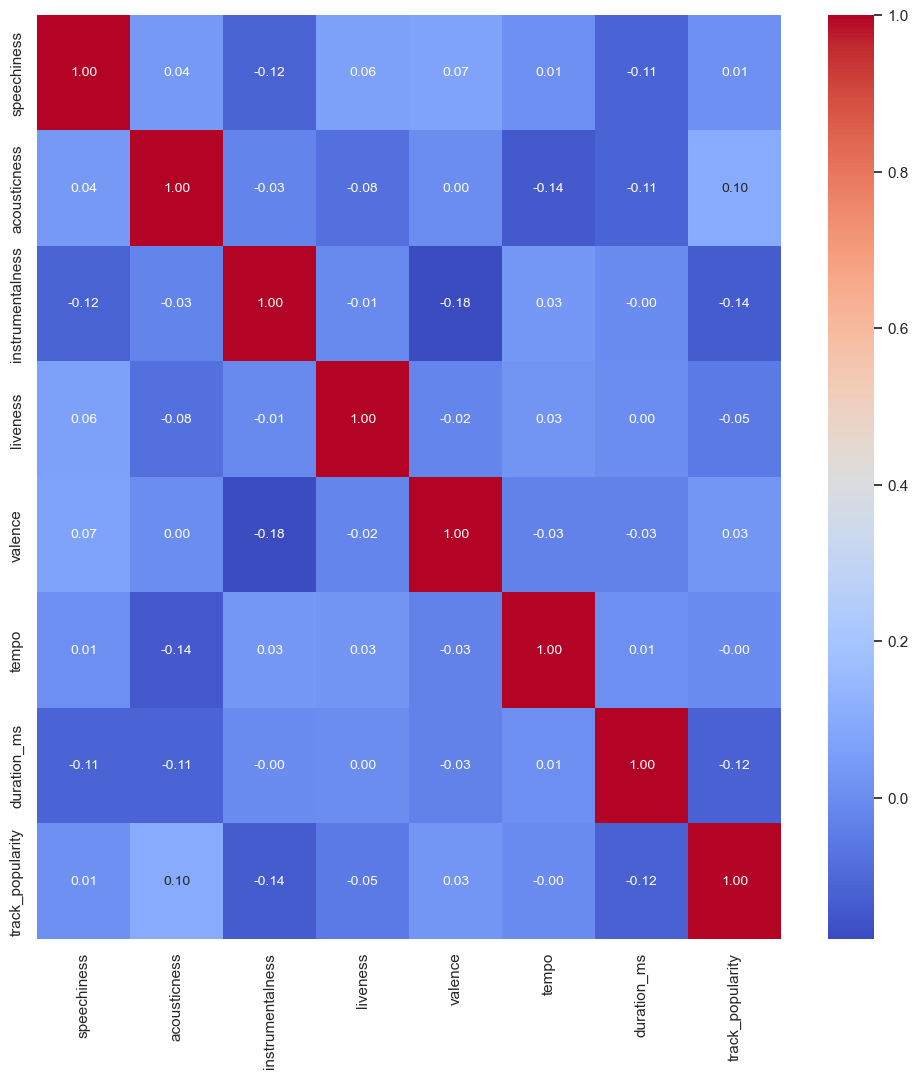

In [17]:
# Calcular la matriz de correlación
corr_matrix = df1.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.grid(False)
plt.show()

In [18]:
target_corr = corr_matrix['track_popularity']

top_3_positive = target_corr.sort_values(ascending=False).head(6)
top_3_positive = top_3_positive.drop('track_popularity')
top_3_negative = target_corr.sort_values(ascending=True).head(5)

print("Top 3 variables con la mayor correlación positiva con 'track_popularity':")
print(top_3_positive)

print("\nTop 3 variables con la mayor correlación negativa con  'track_popularity':")
print(top_3_negative)

Top 3 variables con la mayor correlación positiva con 'track_popularity':
acousticness    0.099035
valence         0.029856
speechiness     0.010782
tempo          -0.002697
liveness       -0.051284
Name: track_popularity, dtype: float64

Top 3 variables con la mayor correlación negativa con  'track_popularity':
instrumentalness   -0.135375
duration_ms        -0.124683
liveness           -0.051284
tempo              -0.002697
speechiness         0.010782
Name: track_popularity, dtype: float64


In [53]:
# Verifica si hay registros duplicados en todo el DataFrame
def duplicados(df1):
  """
  Verifica si el DataFrame ingresado tiene
  registros duplicados.

  :param:
  :df: DataFrame con los atributos.
  """
  hay_duplicados = df1.duplicated().any()

  if hay_duplicados:
      print("El DataFrame tiene registros duplicados.")
  else:
      print("El DataFrame no tiene registros duplicados.")

In [54]:
# Busca el rango de cada caracteristica
rango = df1.describe().loc[['min', 'max']]

# Se agrega el indice 'range' y  se completa la fila creada con la diferencia entre 'max' y 'min'.
rango.loc['range'] = rango.loc['max'] - rango.loc['min']

# se presenta el rango de cada campo
rango.head()

,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_popularity
min,0.022153,0.000001,0.000000,0.009316,0.00001,3.596682,10.355518,0.0
max,0.651283,0.690143,0.690143,0.691145,0.99100,5.482471,13.157366,100.0
range,0.629130,0.690141,0.690143,0.681829,0.99099,1.885789,2.801847,100.0


In [55]:
# Verifica si existe alguna fila con todos los valores como '-'
hay_fila_con_solo_guiones = df1.apply(lambda row: all(cell == '-' for cell in row), axis=1).any()

print(f"¿Existe alguna observación completada solo con '-': {hay_fila_con_solo_guiones}")

¿Existe alguna observación completada solo con '-': False


### Entrenamiento de modelo 

------
- **Elección de modelos**: Dado que queremos predecir un evento específico. Los modelos a considerar incluyen regresión logística, árboles de decisión, random forest, etc:
    * Random Forest:
        
    * XGBoost:
      
    * Árbol de Decisión:
        
    * Descartamos Support Vector Machines (SVM) por su complejidad computacional
- **Evaluación de los modelos**: 
    * Métricas: vamos a evaluar y comparar el rendimiento de los modelos con las siguientes métricas:
        * Recall (Sensibilidad):  
        * F1-Score: 
        * AUC: 
        *
    * Validación Cruzada: Vamos a implementar validación cruzada para asegurar que los modelos generalizan bien a datos no vistos.
    * Ajuste de Hiperparámetros: Vamos a optimizar los hiperparámetros de los modelos para mejorar su rendimiento.



In [56]:
#Dibuja la matriz de confusión del modelo

def showConfMatrix(y_ts, y_pred, classes, model_name, color='Greens', n_graph=2):
    ## Matriz de confusión
    cm = confusion_matrix(y_ts, y_pred)
    
    g_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

    if n_graph == 2:
        fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]})
        ax0.axvline(x=0.5, color='gray', linestyle='--')
        ax0.axhline(y=0.5, color='gray', linestyle='--')
        ax0.text(0.25, 0.75, 'VERDADEROS\nNEGATIVOS', fontsize=12, ha='center', va='center')
        ax0.text(0.75, 0.75, 'FALSOS\nPOSITIVOS', fontsize=12, ha='center', va='center')
        ax0.text(0.25, 0.25, 'FALSOS\nNEGATIVOS', fontsize=12, ha='center', va='center')
        ax0.text(0.75, 0.25, 'VERDADEROS\nPOSITIVOS', fontsize=12, ha='center', va='center')
        ax0.set_xlim(0, 1)
        ax0.set_ylim(0, 1)
        ax0.axis('off')
    else:
        fig, ax1 = plt.subplots(figsize=(7, 5))

    g_cm.plot(ax=ax1, cmap=color)
    ax1.set_title(model_name)
    ax1.set_xlabel('Predicción') 
    ax1.set_ylabel('Valor verdadero') 
    
    plt.tight_layout()
    plt.show()

    return cm.ravel()
    

#Muestra la curva ROC del modelo
# Devuelve el área bajo la curva


def showROC(y_ts, arr_models):

    plt.figure(figsize=(5, 5))
    auc_models = {}
    
    for model_name, color, y_probs in arr_models:
 
        fp, p, thresholds = roc_curve(y_ts, y_probs)
        plt.plot(fp, p, color=color, label=model_name)
        auc_models[model_name] = auc(fp, p)
        
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel("Tasa de Falsos Positivos")
    plt.ylabel("Tasa de Verdaderos Positivos")
    plt.title('Curva ROC')
    plt.legend()
    plt.grid(True)
    plt.show()

    return auc_models

"""
Devuelve las métricas del modelo
"""
def getMetrics(y_ts, y_pred, cm, model_name):
    
    metrics = {}
    tn, fp, fn, tp = cm
    #TN (True Negatives): Verdaderos negativos.
    #FP (False Positives): Falsos positivos.
    #FN (False Negatives): Falsos negativos.
    #TP (True Positives): Verdaderos positivos.

    metrics[model_name] = [
        # Exactitud => Proporción de instancias correctamente clasificadas 
        #(tanto positivas como negativas) respecto al total de instancias.
        ["Accuracy", round(accuracy_score(y_ts, y_pred), 4)],
        # Precisión => cuántas de las predicciones positivas 
        # del modelo son realmente correctas.
        ["Precision", round(precision_score(y_ts, y_pred, zero_division=0), 4)],
        # Especificidad => qué tan bien el modelo puede identificar las instancias negativas 
        # y evitar clasificarlas incorrectamente como positivas
        ["Specificity",  round(tn / (tn + fp), 4)],     
        # Exactitud balanceada => considera el desbalance de clases al calcular la exactitud
        ["Balanced Accuracy",  round(((tp / (tp + fn)) + (tn / (tn + fp))) / 2, 4)], 
        # Sensibilidad = Recuperación => capacidad del modelo 
        #para identificar correctamente las instancias positivas.
        ["Recall", round(recall_score(y_ts, y_pred, zero_division=0), 4)], 
        # Equilibrio entre precisión y recuperación
        ["F1-Score", round(f1_score(y_ts, y_pred, zero_division=0), 4)], 
    ]

    return metrics

def printMetrics(metrics, n, s, b):
    
    model = next(iter(metrics))
    
    df_metrics = pd.DataFrame ([model], columns=['Modelo'])

    df_metrics['Características'] = n
    df_metrics['Escalamiento'] = s
    df_metrics['Búsqueda Hp'] = b 
   
    for metric, value in metrics[model]:
        df_metrics[metric] = value
    
    return df_metrics

In [57]:
# Ejecuta Regresión Logística y devuelve predicciones, clases, y probabilidades

def LogRegression (X_tr, y_tr, X_ts, y_ts):
    lregression = LogisticRegression(random_state = 42, class_weight="balanced")
    lregression.fit(X_tr, y_tr)

    y_pred_lr = lregression.predict(X_ts)
    y_probs_lr = lregression.predict_proba(X_ts)[:, -1]
    
    return y_pred_lr, lregression.classes_, y_probs_lr

In [58]:
# Utiliza validación cruzada para encontrar la combinación que mejor optimiza
#  el rendimiento del modelo según el criterio de evaluación dado

def LogRegressionHiperP (X_tr, y_tr, X_ts, y_ts, param_grid, max_i, p_cv, metric):

    lregression = LogisticRegression(max_iter=max_i)
    grid_search = GridSearchCV(lregression, param_grid, cv=p_cv, scoring=metric)

    grid_search.fit(X_tr, y_tr)

    # Mejor modelo
    best_model = grid_search.best_estimator_
                                   
    y_pred_lr = best_model.predict(X_ts)

    y_probs_lr = best_model.predict_proba(X_ts)[:, -1]

    # Devuelve lo mismo que la función anterior + los mejores hiperparámetros encontrados
    return y_pred_lr, best_model.classes_, y_probs_lr, best_model


In [59]:
def SVCHiperP (X_tr, y_tr, X_ts, y_ts, param_grid, p_cv, metric):

    # Support Vector Classifier
    model = SVC(probability=True)

    # Grilla de hiper-parámetros
    grid_search = GridSearchCV(model, param_grid, cv=p_cv, scoring=metric) 

    # Entrena el modelo
    grid_search.fit(X_tr, y_tr)

    # Obtiene los mejores hiper-parámetros
    best_model = grid_search.best_estimator_

    # Obtiene las predicciones en el conjunto de prueba
    y_pred_svm = best_model.predict(X_ts)

    y_probs_svm = best_model.predict_proba(X_ts)[:, -1]

    return y_pred_svm, best_model.classes_, y_probs_svm, best_model

In [60]:
def DecisionTreeHiperP (X_tr, y_tr, X_ts, y_ts, param_grid, p_cv, metric):

    # Crea el modelo de arbol de clasificacion
    model = DecisionTreeClassifier()

    # Configura GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=p_cv, scoring=metric)

    # Entrena el modelo
    grid_search.fit(X_tr, y_tr)

    # Obtiene los mejores hiper-parametros
    best_model = grid_search.best_estimator_

    # Obtiene las predicciones en el conjunto de prueba
    y_pred_dt = best_model.predict(X_ts)

    y_probs_dt = best_model.predict_proba(X_ts)[:, -1]

    return y_pred_dt, best_model.classes_, y_probs_dt, best_model

In [61]:
def KnnHiperP (X_tr, y_tr, X_ts, y_ts, param_grid, p_cv, metric):

    knn = KNeighborsClassifier()

    # Búsqueda de hiperparámetros por GridSearchCV
    grid_search = GridSearchCV(knn, param_grid, cv=p_cv, scoring=metric)

    grid_search.fit(X_tr, y_tr)

    # Obtener los mejores hiperparámetros
    best_model = grid_search.best_estimator_
        
    # Obtener las predicciones en el conjunto de prueba
    y_pred_knn = best_model.predict(X_ts)

    return y_pred_knn, best_model.classes_, best_model

In [62]:
def PerceptronHiperP (X_tr, y_tr, X_ts, y_ts, param_grid, p_cv, metric):

    # Crea el modelo de perceptron
    model = Perceptron()

    # Realiza la busqueda de hiperparametros con GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=p_cv, scoring=metric)

    # Entrena el modelo
    grid_search.fit(X_tr, y_tr)

    # Obtiene los mejores hiperparametros
    best_model = grid_search.best_estimator_
    
    # Obtiene las predicciones en el conjunto de prueba
    y_pred_p = best_model.predict(X_ts)

    return y_pred_p, best_model.classes_, best_model

In [63]:
def EnsambleBagg(X_tr, y_tr, X_ts, y_ts, estimators, params, n, metric, p_cv):

    # Clasificador de Bagging
    bagging = BaggingClassifier(random_state=42)

    # Configurar la busqueda aleatoria
    random_search = RandomizedSearchCV(bagging, params, n_iter=n, scoring=metric, cv=p_cv, random_state=42, n_jobs=-1)

    # Ajusta el modelo
    random_search.fit(X_tr, y_tr)

    # Predice con el mejor modelo encontrado
    best_model = random_search.best_estimator_
    y_pred_ebagg = best_model.predict(X_ts)

    return y_pred_ebagg, best_model.classes_, best_model

In [64]:
def EnsambleBoost(X_tr, y_tr, X_ts, y_ts, param_grid, metric, p_cv):

    # Crea el ensamble
    model = XGBClassifier()

    # Realiza la busqueda de hiperparámetros con GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=metric, cv=p_cv, n_jobs=-1, verbose=1)

    # Entrena el modelo
    grid_search.fit(X_tr, y_tr)

    # Obtiene los mejores hiperparámetros
    best_model = grid_search.best_estimator_

    # Obtiene las predicciones en el conjunto de prueba
    y_pred_boost = best_model.predict(X_ts)

    y_probs_boost = best_model.predict_proba(X_ts)[:, -1]
    
    return y_pred_boost, best_model.classes_, y_probs_boost, best_model

In [65]:
### Decision Tree 
# Entrena el modelo Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predice y evalua el modelo con todas las caracteristicas
y_pred_all_features = model.predict(X_test)
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
print(f'Exactitud con todas las características: {accuracy_all_features:.2f}')

# Obtiene la importancia de las caracteristicas
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': importances}).sort_values(by='Importance', ascending=False)

# Muestra la importancia de las caracteristicas
print("Importancia de las características:")
print(feature_importance_df)

# Selecciona las caracteristicas mas importantes
selector = SelectFromModel(model, prefit=True, threshold=0.01)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Muestra las caracteristicas seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:")
print(selected_features)

# Entrena el modelo Decision Tree con las caracteristicas seleccionadas
model_selected = DecisionTreeClassifier(random_state=42)
model_selected.fit(X_train_selected, y_train)

# Predice y evaluar el modelo con las caracteristicas seleccionadas
y_pred_selected_features = model_selected.predict(X_test_selected)
accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)

print()
print(f'Exactitud con las características seleccionadas: {accuracy_selected_features:.2f}')
print("Características seleccionadas:\n")

for item in selected_features:
    print(features_esn[item])

df_selection_1 = pd.DataFrame(data = {
    'DecisionTree': selected_features
})

NameError: name 'X_test' is not defined

## Modelo PC6

In [41]:
df6 = pd.read_csv("D:\ESP. INTELIGENCIA ARTIFICIAL UBA\AMQ1\df_pca6.csv")

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\PC-Solution 21-3-24\AppData\Local\Temp\ipykernel_25428\3503653081.py:1: SyntaxWarning: invalid escape sequence '\E'
  df6 = pd.read_csv("D:\ESP. INTELIGENCIA ARTIFICIAL UBA\AMQ1\df_pca6.csv")


In [42]:
df6.head()

,PC0,PC1,PC2,PC3,PC4,PC5,track_id,track_popularity
0,-1.857132,-0.653643,0.621619,-1.263517,-0.596871,-0.812058,6f807x0ima9a1j3VPbc7VN,0.617978
1,-1.010258,-0.698129,-0.014749,-0.410270,1.321001,-0.397733,0r7CVbZTWZgbTCYdfa2P31,0.629213
2,-1.877933,-0.550120,0.252759,-0.883555,-0.459042,-0.552848,1z1Hg7Vb0AhHDiEmnDE79l,0.662921
3,-1.826773,0.102045,0.812300,-0.143904,0.139718,-0.676533,75FpbthrwQmzHlBJLuGdC7,0.550562
4,-1.030455,-0.473479,-0.048592,-1.058530,-0.662907,-0.526060,1e8PAfcKUYoKkxPhrHqw4x,0.651685


In [44]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23081 entries, 0 to 23080
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PC0               23081 non-null  float64
 1   PC1               23081 non-null  float64
 2   PC2               23081 non-null  float64
 3   PC3               23081 non-null  float64
 4   PC4               23081 non-null  float64
 5   PC5               23081 non-null  float64
 6   track_id          23081 non-null  object 
 7   track_popularity  23081 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.4+ MB


In [45]:
# Datos faltantes 
# Test no tiene nulos, train parece tener una fila toda vacía (nan) que hay que eliminar
print(f"Datos faltantes en train sample:")
print(df6.isnull().sum(axis = 0))
print('-----------------------------------')
print(f"Datos faltantes en test sample:")
print(df6.isnull().sum(axis = 0))

Datos faltantes en train sample:
PC0                 0
PC1                 0
PC2                 0
PC3                 0
PC4                 0
PC5                 0
track_id            0
track_popularity    0
dtype: int64
-----------------------------------
Datos faltantes en test sample:
PC0                 0
PC1                 0
PC2                 0
PC3                 0
PC4                 0
PC5                 0
track_id            0
track_popularity    0
dtype: int64


In [46]:

# Eliminar nulos 
print(df6.shape)
df6 = df6.dropna()
print(df6.shape)

(23081, 8)
(23081, 8)


In [47]:
# Estadistica descriptiva Var numericas
df6.describe()

,PC0,PC1,PC2,PC3,PC4,PC5,track_popularity
count,2.308100e+04,23081.000000,2.308100e+04,2.308100e+04,2.308100e+04,2.308100e+04,23081.000000
mean,-1.970224e-17,0.000000,9.851119e-18,-2.462780e-17,9.851119e-18,-4.925559e-17,0.430865
std,1.361760e+00,1.230987,1.127831e+00,1.023688e+00,9.875681e-01,9.698235e-01,0.195364
min,-4.092064e+00,-3.906379,-3.764370e+00,-3.081980e+00,-3.138000e+00,-2.534419e+00,0.000000
25%,-1.002944e+00,-0.905027,-6.227485e-01,-6.813310e-01,-6.125217e-01,-6.733487e-01,0.292135
50%,-3.437746e-02,-0.024623,1.664184e-01,-9.523744e-02,-5.690672e-03,-1.534788e-01,0.438202
75%,9.627764e-01,0.863013,7.595926e-01,5.789088e-01,5.604384e-01,5.031453e-01,0.584270
max,4.215151e+00,4.682198,3.808670e+00,6.492539e+00,4.368145e+00,4.521061e+00,1.000000


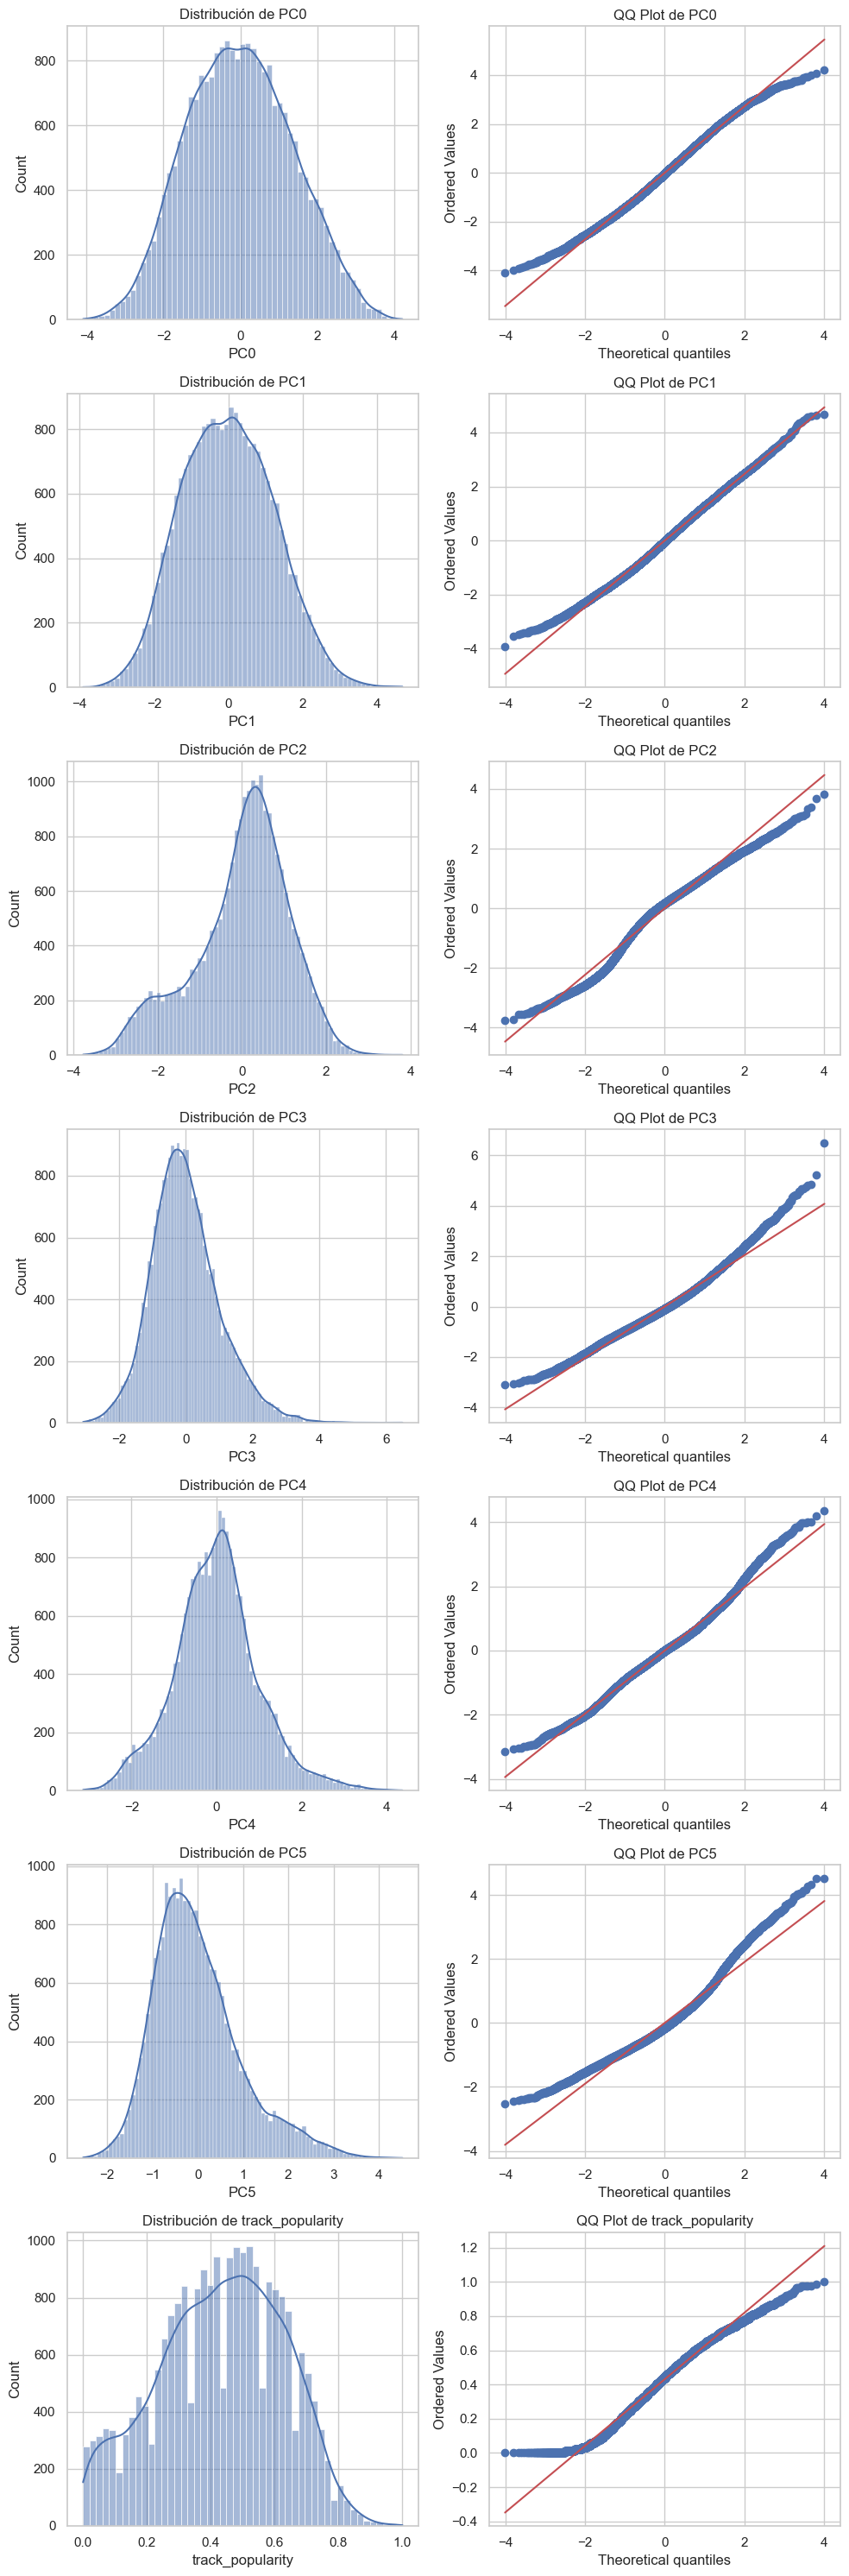

In [48]:
# Configuración de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 30))

# Histograma y QQ plot para cada variable numérica
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

for i, column in enumerate(numerical_columns, 1):
    # Histograma
    plt.subplot(len(numerical_columns), 2, 2*i-1)

    if column == 'Rainfall':
        # Modificaciones para Rainfall
        data = np.log1p(df[column].dropna()[df6[column] > 0])
        sns.histplot(data, bins=100, kde=True)
        plt.title(f'Distribución Logarítmica de {column} (Sin Nulos, Bins reducidos)')
    else:
        # Para las otras variables
        sns.histplot(df6[column].dropna(), kde=True)
        plt.title(f'Distribución de {column}')

    # QQ plot
    plt.subplot(len(numerical_columns), 2, 2*i)

    if column == 'Rainfall':
        stats.probplot(data, dist="norm", plot=plt)
        plt.title(f'QQ Plot Logarítmico de {column}')
    else:
        stats.probplot(df6[column].dropna(), dist="norm", plot=plt)
        plt.title(f'QQ Plot de {column}')

plt.tight_layout()
plt.show()

In [51]:
# Nueva dataset 
df61 = df6[['PC0', 'PC1', 'PC2',
          'PC3', 'PC4', 'PC5', 'track_popularity']]

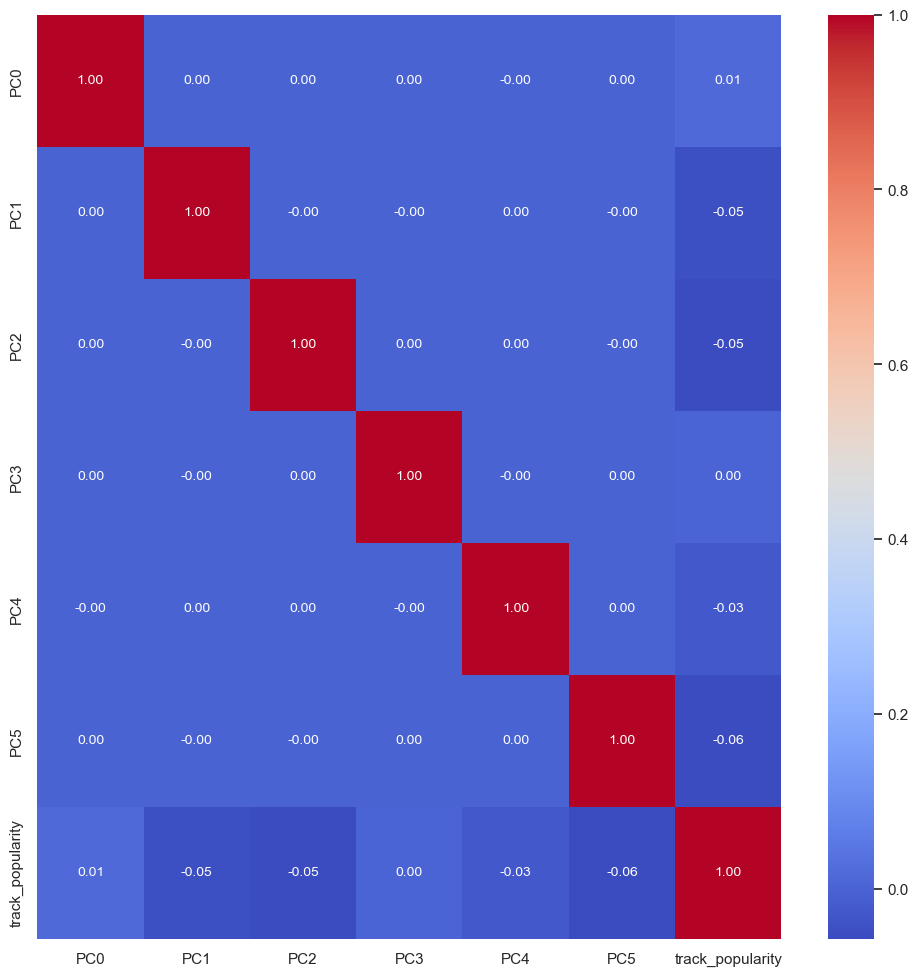

In [52]:
# Calcular la matriz de correlación
corr_matrix = df61.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.grid(False)
plt.show()